In [1]:
import numpy as np
import scipy as sp
import astropy as ap
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt

fontsize = 18

plt.rcParams.update({
    'font.size': fontsize,  # This sets the default font size for everything
    'axes.titlesize': fontsize,
    'axes.labelsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'legend.fontsize': fontsize,
    'figure.titlesize': fontsize
})

figsize = 4.5
dpi = 350
import matplotlib.ticker as ticker
plt.style.use('style_prof2.mplstyle')

In [2]:
E_Gamow = 493 * u.keV #A.C. Phillips
T = 1e7 * u.K
energies = np.linspace(0.001,20,500) * u.keV

In [3]:
boltzmann = np.exp(-energies/(const.k_B * T))
tunneling = np.exp(-np.sqrt(E_Gamow/energies))

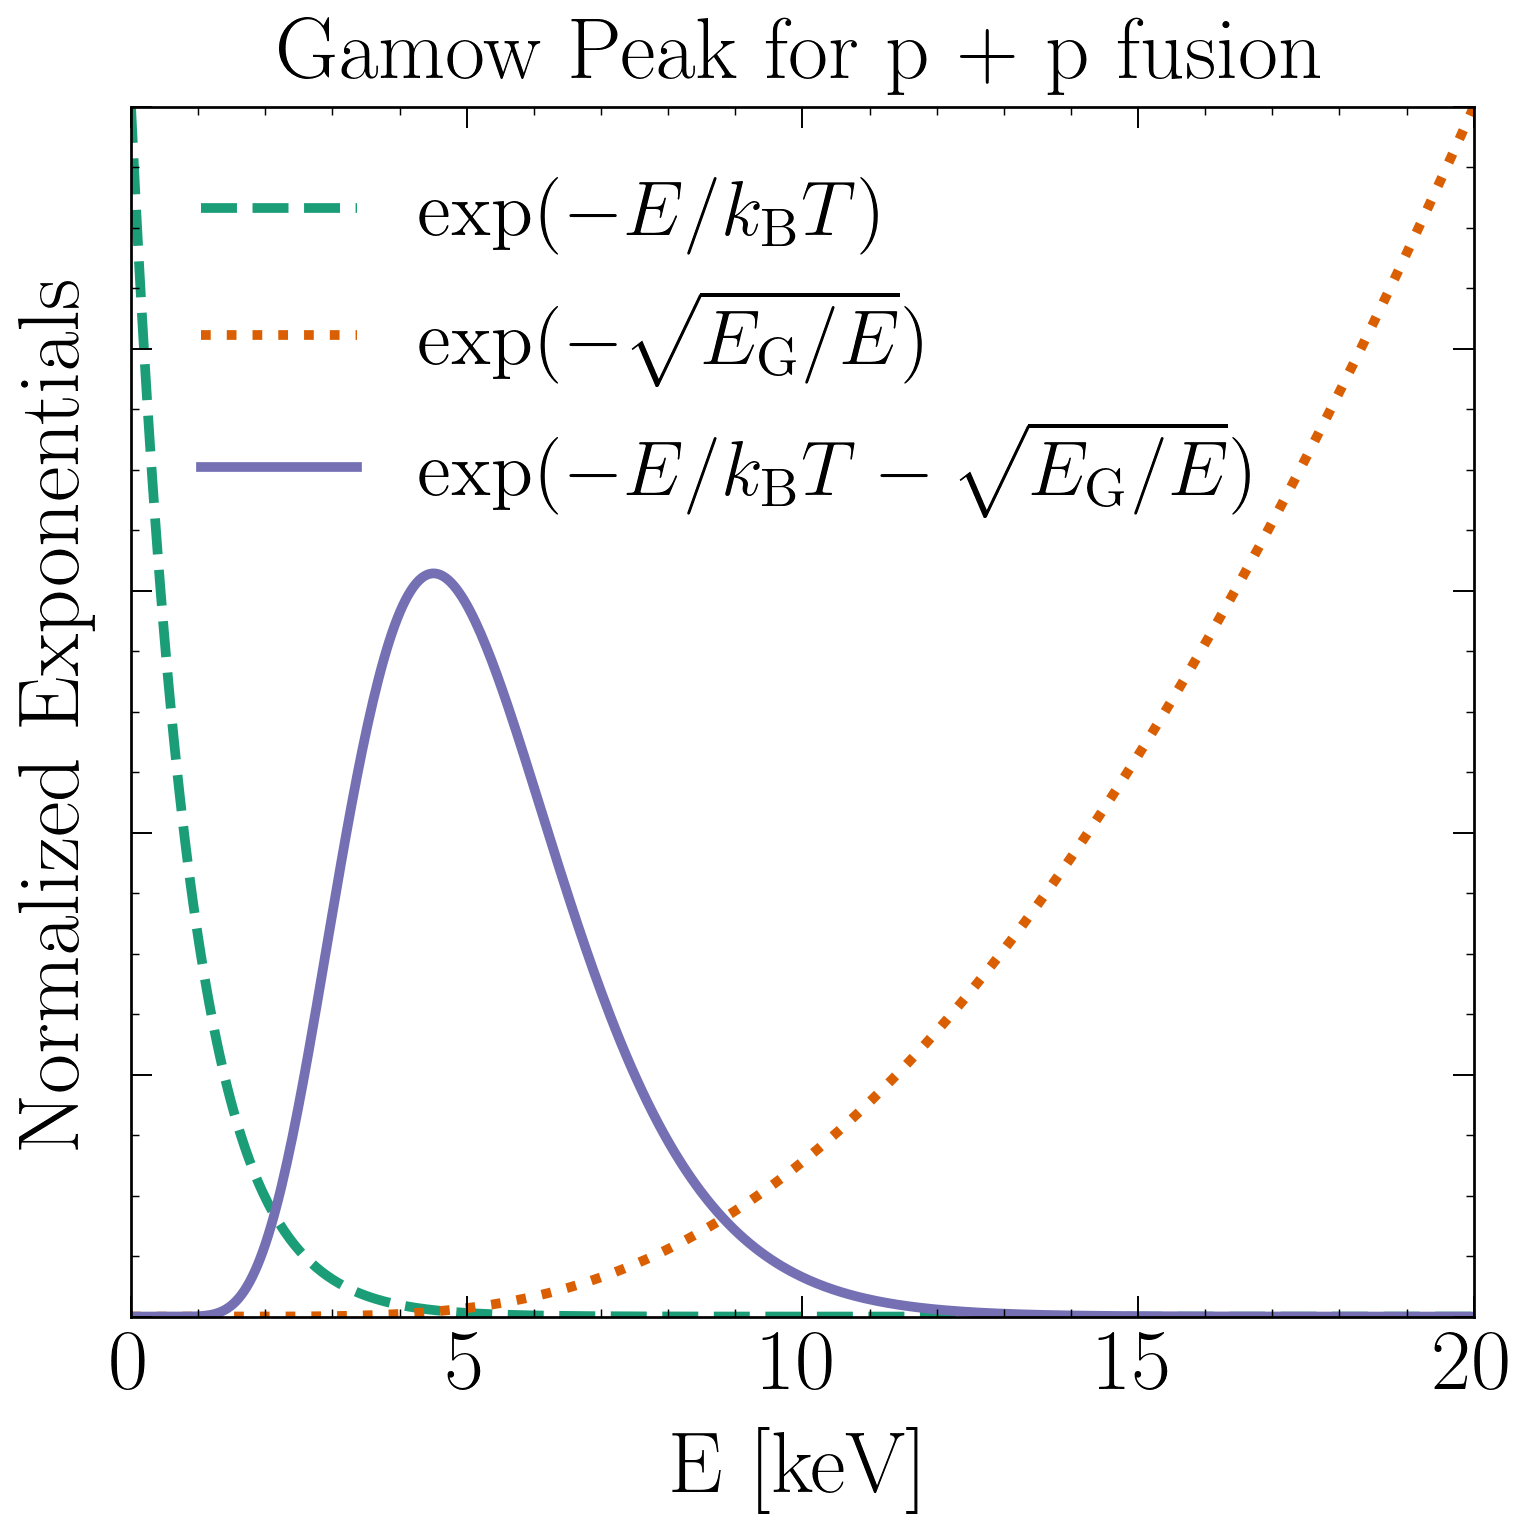

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
lw = 2
ax.plot(energies,boltzmann/max(boltzmann),ls='dashed',lw=lw,label=r'$\exp(-E/k_{\mathrm{B}}T)$')
ax.plot(energies,tunneling/max(tunneling),ls='dotted',lw=lw,label=r'$\exp(-\sqrt{E_\mathrm{G}/E})$')
product = boltzmann*tunneling
ax.plot(energies,4e6*product,lw=lw,label=r'$\exp(-E/k_{\mathrm{B}}T-\sqrt{E_\mathrm{G}/E})$')
ax.set_xlim(0,20)
ax.set_ylim(0,1)
ax.set_xlabel(r'E [keV]')
ax.set_ylabel(r'Normalized Exponentials')
ax.legend(fontsize=16)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
ax.set_title("Gamow Peak for p + p fusion")
plt.tight_layout()
plt.savefig('Gamow.pdf')
plt.show()